
# **Mini Introduccion Teorica Haze**



Hasta ahora hemos visto imagenes sin obstruccion atmosferica, donde toda la luz reflejada por un objeto llega a la camara sin ningun tipo de degradacion y donde el ruido es mayormente causado por limitaciones del sensor. Ser dependientes a estas condiciones optimas hara que tambien seamos propensos a errores ante distintos climas, donde la humedad en el aire puede interponerse entre la camara y la escena. Dependiendo el uso que le demos a nuestros algoritmos, [puede ser crucial](https://www.autoblog.com/news/fatal-crashes-expose-the-dangers-of-teslas-autopilot) tener robustes sobre las principales obstrucciones como la niebla o bluma.

## **Modelo de imagen**
Tanto el paper a leer como la mayoria de la literatura del tema, hablaran de las imagenes utilizando un modelo fisico basado en el recorrido de los *rayos de luz* desde la fuente hasta la camara.

Toda foto se basa en una **fuente** que irradia rayos de luz, por ejemplo el sol, y la manera en que estos rayos son reflejados contra las superficies en la escena. Cuando un rayo rebota contra una superficie es parcialmente absorvido y lanzado hacia varias direcciones con menos intensidad con la que entro. La intensidad final del rayo en direccion a la camara luego de ser reflejado se llamara **Scene Radiance**, y una imagen se puede entender como la intensidad con la que estos rayos **llegaron** a la camara, llamada **Observe Intensity**.

Por ahora solo hemos tratado con imagenes donde **Scene Radiance =  Observe Intensity**

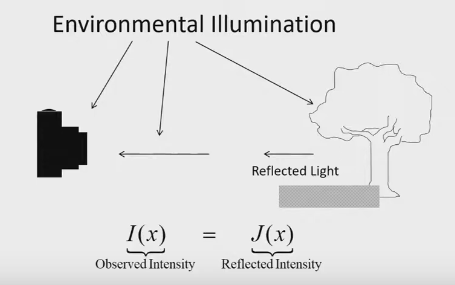

Este modelo ignora las millones de particulas que se encuentran suspendidas en el aire y que tambien son una superficie donde la luz puede reflejarse. Un ejemplo de esto lo vemos claramente en el cielo. En la atmosfera se encuentran suspendidas particulas que dispersan particularmente las *'ondas azules'* de los rayos del sol, mientras que deja a la *'luz roja'* en su trayectoria original. Por esta misma razon vemos el cielo como azul, pero rojizo en la puesta del sol porque los rayos deben atravezar mayor distancia por la atmsofera.
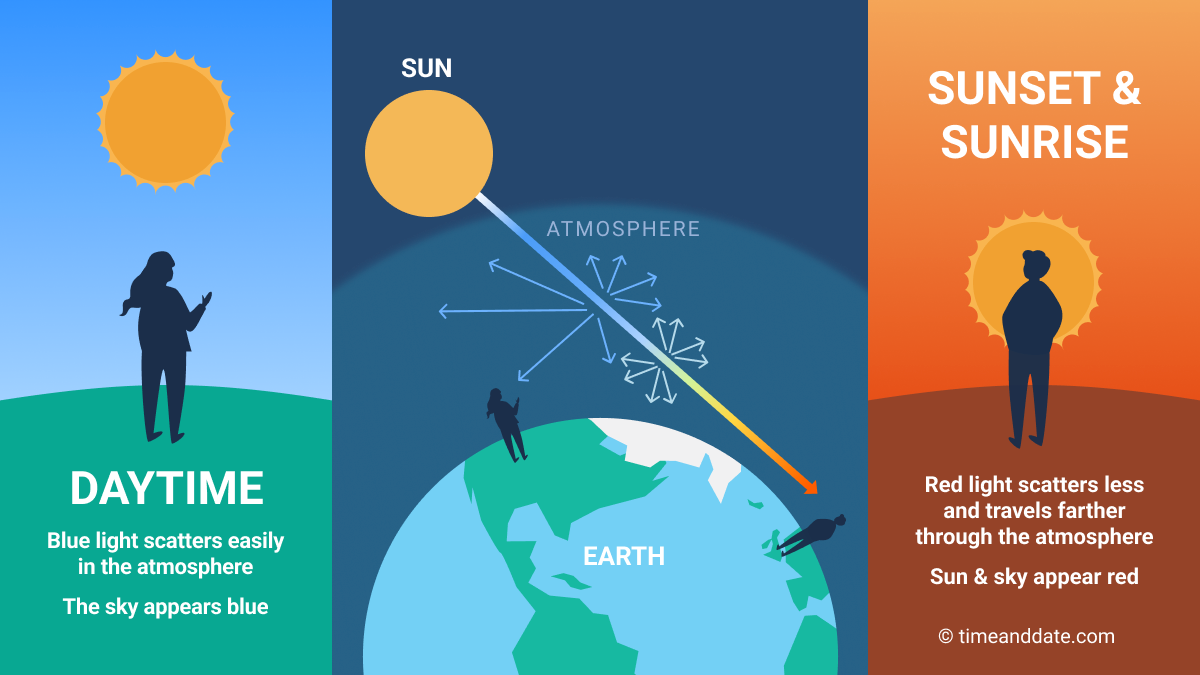

Aunque estas particulas suelen ser insignificante, su efecto se vuelve notable cuando estan recubiertas por una capa de agua, es decir, cuando hay humedad en el ambiente y causan bluma/neblina

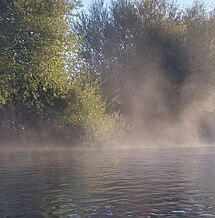

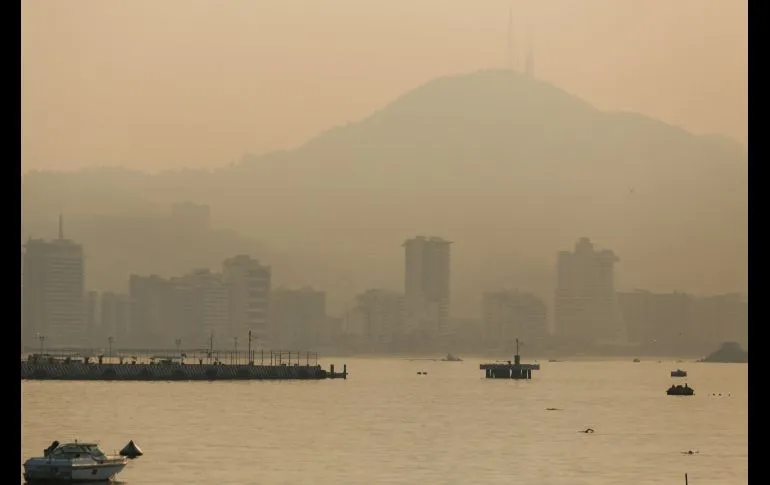

Una mejor representacion de esta situacion seria agregar un coeficiente que indique cuanta intensidad reflejada contra una superficie llega finalmente a la camara, lo que llamaremos la transmicion del medio. Este coeficiente ira de 1, completamente despejado, a 0, toda la informacion de la superficie se pierde.

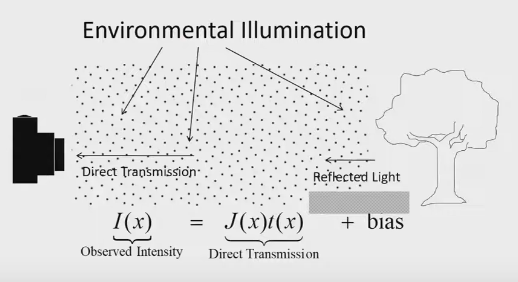

La combinacion del la Scene Radiance y t la llamaremos transmicion directa. Tambien debemos agregar una constante para hablar de la luz ambiental que llega a la camara por rebotar en las particulas. Cuanto mas informacion llegue de la superficie, menos impacto tendra esta luz, por lo que podemos describirla como A*(1-t*(x)), donde A es la intensidad de la luz ambienta.


Por ultimo, cuanto mas alejado un objeto este de la camara, menos de la intensidad llegara a los sensores, ya que la mayoria sera dispersada en el camino, algo parecido a lo que sucede con el sol al anochecer y su "luz azul".

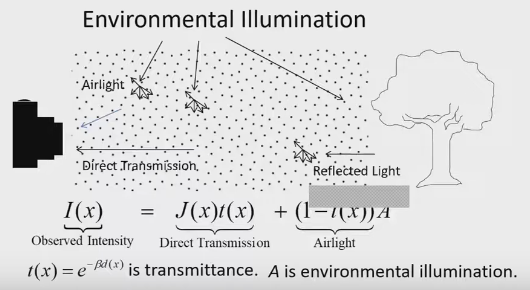

Mas especificamente, se perdera informacion exponencialmente en relacion a la distacia contra la camara y un coeficiente **beta** que describira la densidad de la neblina.

El objtivo del paper pasado es de conseguir **J** y **t** teniendo solo la imagen, es decir **I**.

#**Ejemplos usando neblina artifial**
Veamos como los diferentes parametros afectan a la imagen saliente utilizando el dataset "[DIODE: A Dense Indoor and Outdoor DEpth Dataset](https://diode-dataset.org/)" que contiene imagenes de exterior con su respectivo mapa de distancias

In [1]:
from scipy import ndimage
from skimage import img_as_ubyte
from skimage import img_as_float
from skimage import util

import matplotlib.pyplot as plt
import skimage.io as io
import numpy as np
import os

imagenFilename = os.path.join("/content/Imagenes", '00022_00196_outdoor_230_010.png')
distFilename = os.path.join("/content/Imagenes", '00022_00196_outdoor_230_010_depth.npy')

imagenPruebaColor = io.imread(imagenFilename)
imagenPruebaGray = io.imread(imagenFilename, as_gray=True)

mapaDistancia = ((np.load(distFilename) + 50) / 255) * 3


fig, axes = plt.subplots(2, 2, figsize=(8, 6))
ax = axes.ravel()

ax[0].imshow(imagenPruebaColor)
ax[1].imshow(imagenPruebaGray, cmap=plt.cm.gray)
ax[2].imshow(mapaDistancia)

fig.tight_layout()
plt.show()

FileNotFoundError: No such file: '/content/Imagenes/00022_00196_outdoor_230_010.png'

In [ ]:
def agregarNeblina(imagen, mapaDistancia, coeficienteDispersion, ilumnacionAmbiental):

  transmisionMedio = np.squeeze(np.exp((-coeficienteDispersion) * mapaDistancia))
  imagenConNeblina = util.img_as_float64(imagen)
  imagenConNeblina = imagenConNeblina * transmisionMedio + ilumnacionAmbiental * (1 - transmisionMedio)
  return util.img_as_ubyte(imagenConNeblina)

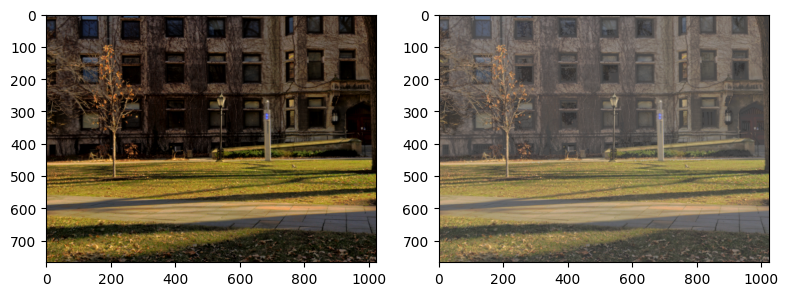

In [ ]:
coeficienteDispersion = 0.5
ilumnacionAmbiental = 0.75

imagenConNeblinaRojo = agregarNeblina(imagenPruebaColor[:,:,0],mapaDistancia, coeficienteDispersion, ilumnacionAmbiental)
imagenConNeblinaVerde = agregarNeblina(imagenPruebaColor[:,:,1],mapaDistancia, coeficienteDispersion, ilumnacionAmbiental)
imagenConNeblinaAzul = agregarNeblina(imagenPruebaColor[:,:,2],mapaDistancia, coeficienteDispersion, ilumnacionAmbiental)
imagenConNeblina = imagenPruebaColor.copy()

imagenConNeblina[:,:,0] = imagenConNeblinaRojo
imagenConNeblina[:,:,1] = imagenConNeblinaVerde

imagenConNeblina[:,:,2] = imagenConNeblinaAzul

fig, axes = plt.subplots(1, 2, figsize=(8, 6))
ax = axes.ravel()

ax[0].imshow(imagenPruebaColor, cmap=plt.cm.gray)
ax[1].imshow(imagenConNeblina)

fig.tight_layout()
plt.show()
